#### **Bundus Bank Seasonal ARIMA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error


In [2]:
air = pd.read_csv("AirPassengers.csv",index_col=0)
air.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
idx=pd.to_datetime(air.index)
air.index=idx
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
y = air['Passengers']
y_train = y[:-12]
y_test = y[-12:]

In [5]:
from pmdarima.arima import auto_arima

In [6]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True,
                  seasonal= True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.31 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.32 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.26 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.40 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.14 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.29 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

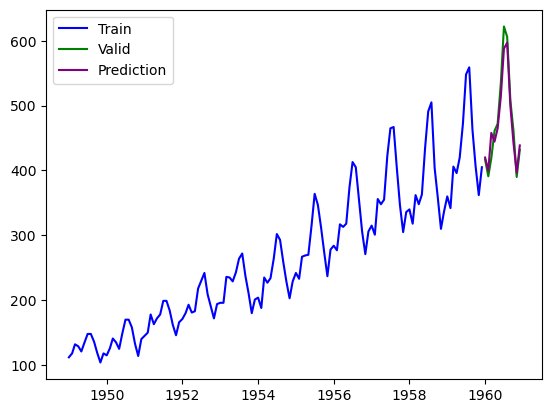

In [8]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="green")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

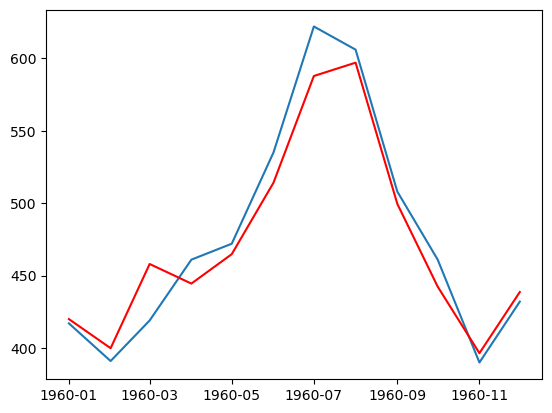

In [9]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 18.536


In [11]:
#### Building model on the whole data
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.18 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.67 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.30 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.67 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.14 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.27 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.54 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.48 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.98 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.09 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(3,1,1)(0,1,0

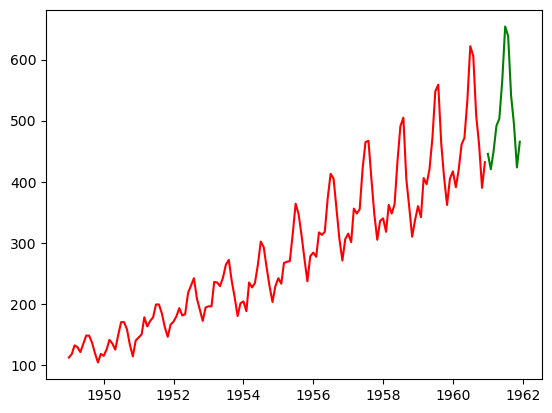

In [12]:
import numpy as np
forecast = model.predict(n_periods=12)
#forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
                       # columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y, label='Train',color="red")

plt.plot(forecast, label='Prediction',color="green")
plt.show()